# Project : - Personal Finance

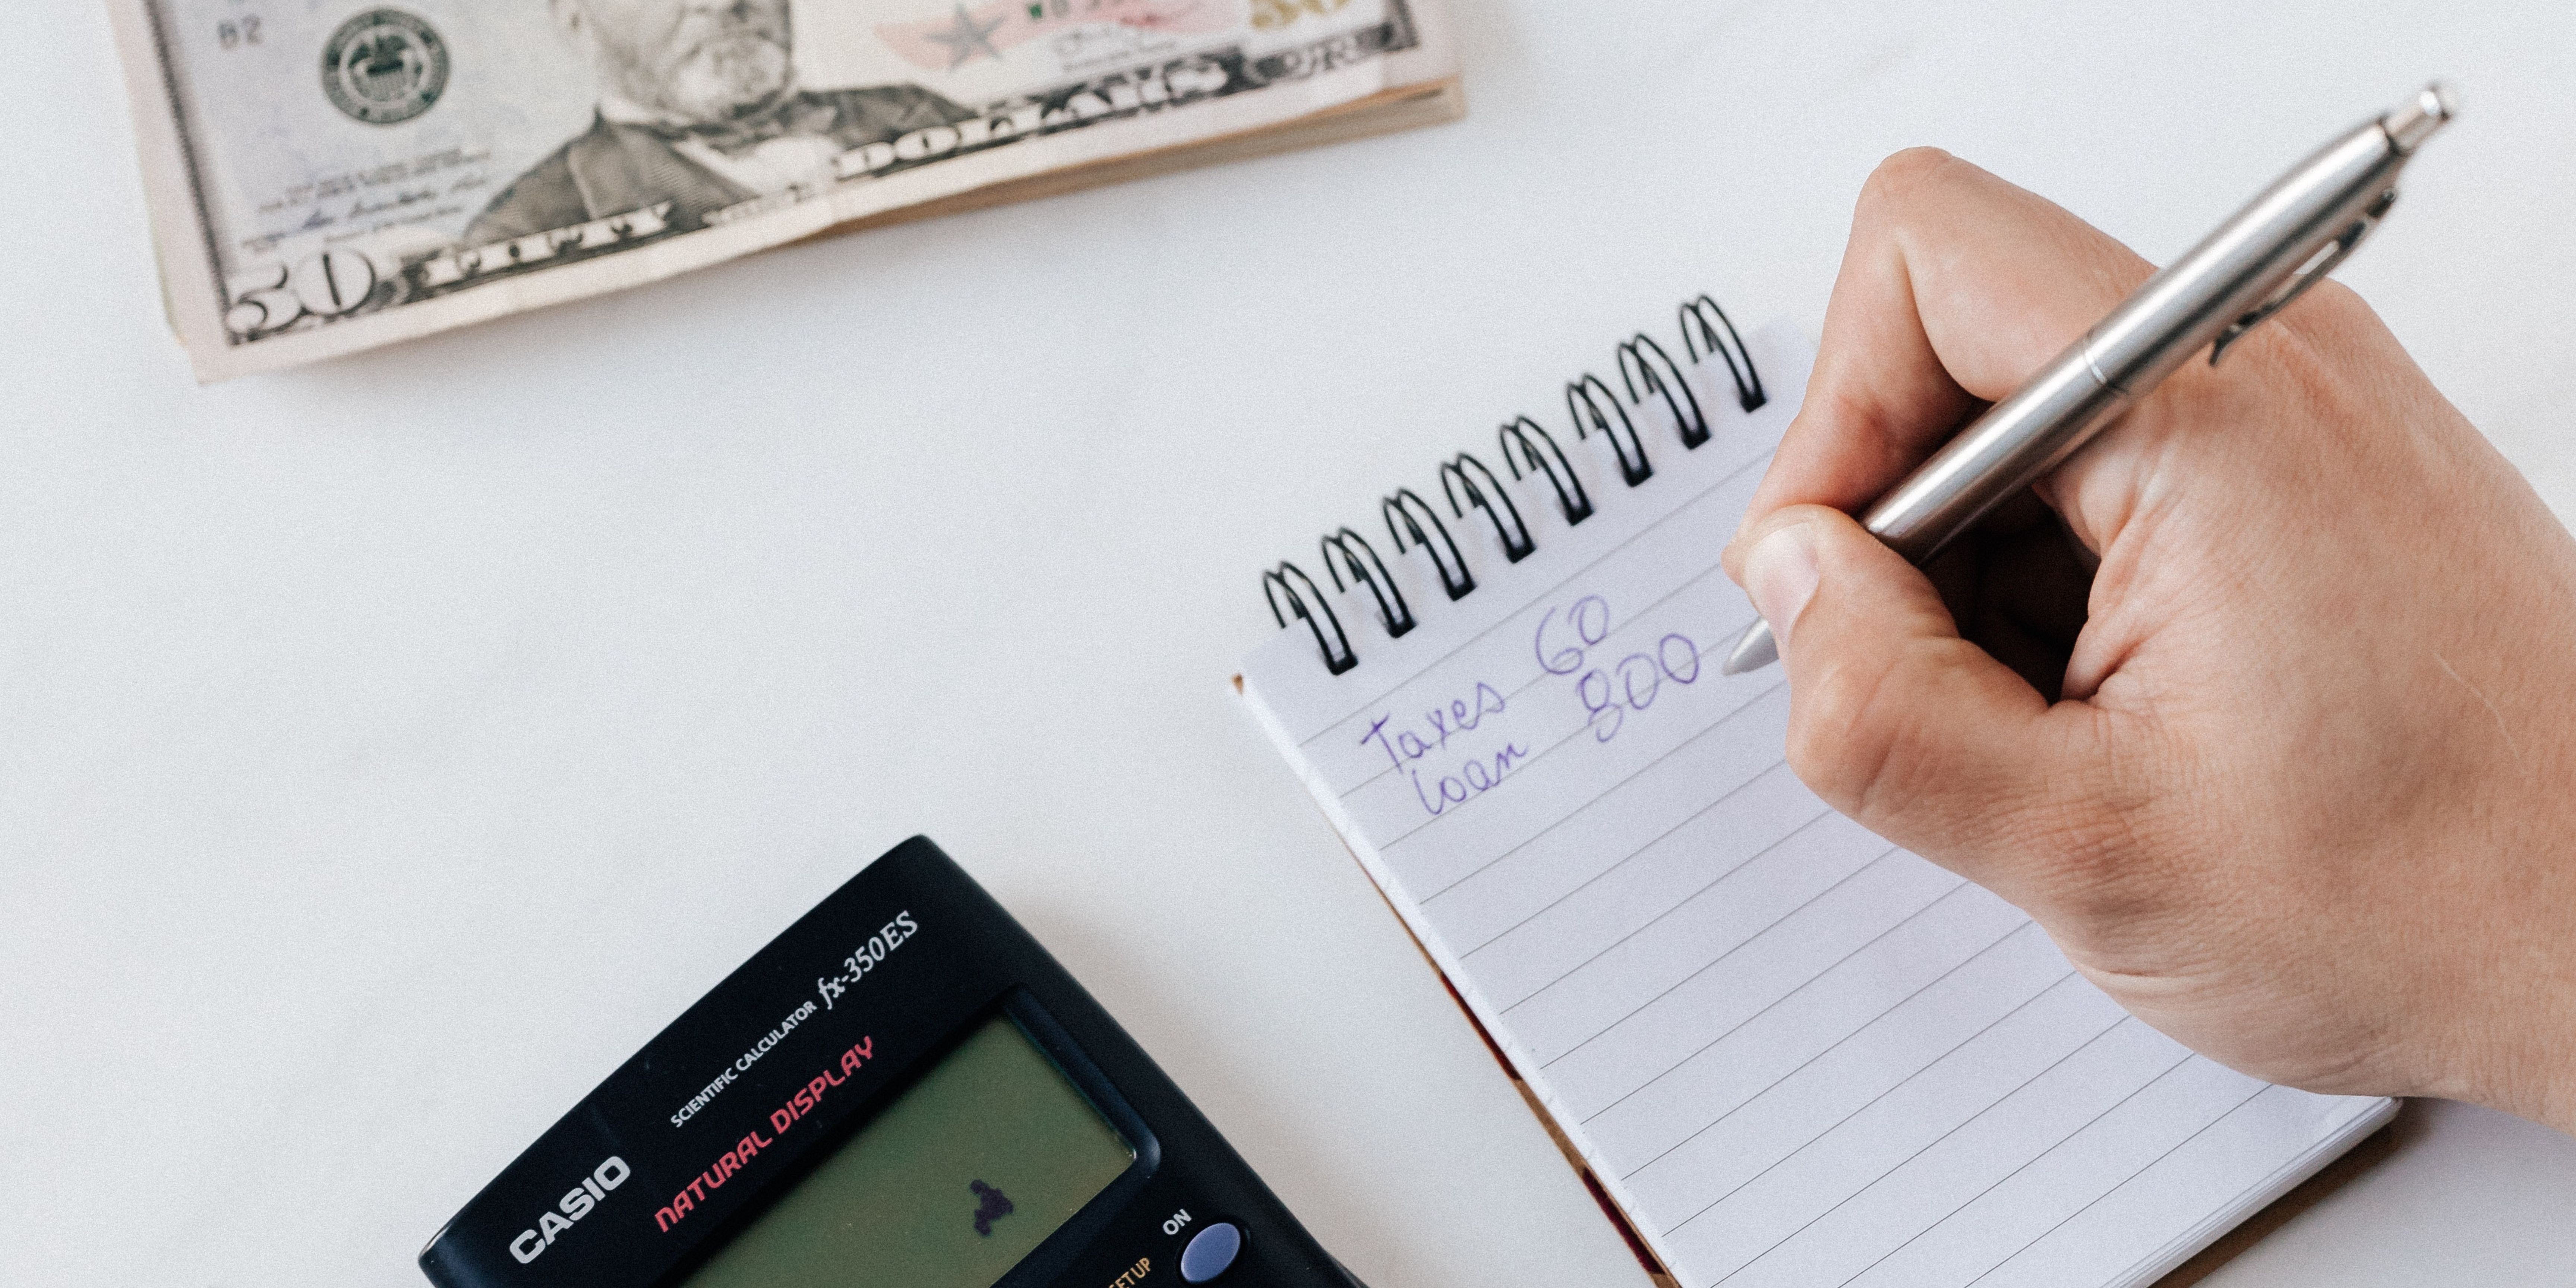

_Personal finance involves managing your money and financial assets. This includes creating a budget, setting financial goals, tracking expenses, and making informed decisions about investing and saving for the future._

_To effectively manage personal finances, it's important to start by creating a budget that outlines income and expenses. This helps identify areas where spending can be reduced to save money. Setting financial goals, such as saving for a down payment on a house or paying off debt, is also important. Once goals are identified, a plan can be developed to achieve them._

_Tracking expenses is crucial to personal finance management. By keeping track of spending, areas where overspending occurs can be identified and adjusted accordingly. Finally, investing and saving for the future are important components of personal finance. By making informed decisions about investments, individuals can grow their wealth over time._

_In your Jupiter Notebook project, you can include further information about each of these topics, as well as tips and resources for managing personal finances effectively._

# Importing the necessary libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Lading the dataset

In [53]:
f_data = pd.read_csv('F:\\Project\\Banking ( expense)\\financial_year.csv')

# Data Pre-processing

In [54]:
f_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                699 non-null    object
 1   Description         699 non-null    object
 2   Ref No./Cheque No.  641 non-null    object
 3   Debit               699 non-null    object
 4   Credit              699 non-null    object
 5   Balance             699 non-null    object
dtypes: object(6)
memory usage: 32.9+ KB


In [55]:
# viewing the first 5 rows 
f_data.head()

Date                                        Description  \
0  1-Apr-22     TO TRANSFER-UPI/DR/209169616147/79061786/BA...   
1  2-Apr-22     TO TRANSFER-UPI/DR/209248567935/PhonePe/YES...   
2  2-Apr-22     by debit card-OTHPOS209205043796INNOVITI PO...   
3  2-Apr-22     TO TRANSFER-UPI/DR/209209086723/MOHMED ALI/...   
4  2-Apr-22     TO TRANSFER-UPI/DR/209261379341/SNAPDEAL/SB...   

          Ref No./Cheque No. Debit Credit   Balance  
0  TRANSFER TO 5099755162093   666         4,910.23  
1  TRANSFER TO 4692647162092   668         4,242.23  
2                        NaN   787         3,455.23  
3  TRANSFER TO 5097986162095    15         3,440.23  
4  TRANSFER TO 5097971162092   575         2,865.23

In [56]:
# viewing the last 5 rows
f_data.tail()

Date                                        Description  \
694  4-Apr-23     ATM WDL-ATM CASH 30941 DEV BHOOMI INST OF T...   
695  4-Apr-23     TO TRANSFER-UPI/DR/309420668848/Somwati/PYT...   
696  4-Apr-23     TO TRANSFER-UPI/DR/309409943260/NARENDRA/YE...   
697  4-Apr-23     TO TRANSFER-UPI/DR/309420787686/GAURAV K/YE...   
698  5-Apr-23     TO TRANSFER-INSUFFICIENT BAL ATM DECLINE CH...   

            Ref No./Cheque No.     Debit Credit   Balance  
694                        NaN  4,000.00         1,344.28  
695  TRANSFER TO 5097638162093       140         1,204.28  
696  TRANSFER TO 4898732162093        10         1,194.28  
697  TRANSFER TO 4692475162096        15         1,179.28  
698  TRANSFER TO 3199937024984      23.6         1,155.68

In [57]:
# Checking for the all the available columns in the data frame
f_data.columns

Index(['Date', 'Description', 'Ref No./Cheque No.', 'Debit', 'Credit',
       'Balance'],
      dtype='object')

<h6> As you can see we have 6 columns in which some of them are no use, so let's remove those columns</h6>
<h6> Columns are</h6>
  
  - Ref No./Cheque No.
  - Credit
  - Balance

In [58]:
# Let's drop the unnecessary columns which has no use in our analysis
df = f_data.drop(['Ref No./Cheque No.', 'Credit','Balance'], axis = 1)

In [59]:
# Columns
df.columns

Index(['Date', 'Description', 'Debit'], dtype='object')

# Converting columns name to lower

In [60]:
df.columns = map(str.lower, df.columns)

In [61]:
df.head(10)

date                                        description debit
0  1-Apr-22     TO TRANSFER-UPI/DR/209169616147/79061786/BA...   666
1  2-Apr-22     TO TRANSFER-UPI/DR/209248567935/PhonePe/YES...   668
2  2-Apr-22     by debit card-OTHPOS209205043796INNOVITI PO...   787
3  2-Apr-22     TO TRANSFER-UPI/DR/209209086723/MOHMED ALI/...    15
4  2-Apr-22     TO TRANSFER-UPI/DR/209261379341/SNAPDEAL/SB...   575
5  2-Apr-22     BY TRANSFER-UPI/CR/209259989593/Razorpay/YE...      
6  3-Apr-22            BY TRANSFER-UPI/209019936720/REVERSAL--      
7  3-Apr-22     TO TRANSFER-UPI/DR/209380047589/KISHAN S/UC...    20
8  3-Apr-22     TO TRANSFER-UPI/DR/209323755090/Narendra/UT...   250
9  4-Apr-22     TO TRANSFER-UPI/DR/209432235162/Deepak P/PY...    30

<h6> There are some transaction which has no use in my analysis just because i get some transactions to get it withdrow isntantly. <h6>
 So it's better get out of the data set.

In [62]:
# Create a Boolean mask for self transactions
self_mask = df['description'].str.contains(' BY TRANSFER|DEV BHOOMI INST OF TECHDEHRADUN|VILLAGE POST BANJARAWA DEHRADUN|FAISAL S',
                                           case=False)
# Drop rows corresponding to self transactions
df = df.drop(df[self_mask].index)

# Analysis Process

In [63]:
# create a new column with transaction category based on the description
df['Category'] = df['debit']  # default category for all transactions
df.loc[df['description'].str.contains('KISHAN S|Deepak P|SHRISHTI|ROHIT KA|ARUN SEH|SHIPRA|LAKSHMI', case=False), 'FoodExpense'] = df['debit']
df.loc[df['description'].str.contains('Dev Bhoo', case=False), 'GasExpense'] = df['debit']
df.loc[df['description'].str.contains('AZEEM|haircut', case=False), 'GroomExpense'] = df['debit']
df.loc[df['description'].str.contains('Ram Baha|Guru Ji|GAURAV K', case=False), 'Stat_expense'] = df['debit']
df.loc[df['description'].str.contains('PhonePe', case=False), 'Bills_expense'] = df['debit']

# convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['date'], format='%d-%b-%y')

# create a new column with the year and month extracted from the 'Date' column
df['Year_Month'] = df['Date'].dt.strftime('%Y-%m')

- We create a new column 'Category' with a default value of 'Other' for all transactions. We then use df.loc[] to assign transaction categories based on the presence of certain keywords in the 'Description' column.

- Next, we convert the 'Date' column to a datetime format using pd.to_datetime(). We then create a new column 'Year_Month' with the year and month extracted from the 'Date' column using the dt.strftime() method.

- The resulting DataFrame will have a new column 'Category' with transaction categories, and a new column 'Year_Month' with the year and month of each transaction.

In [64]:
# Although new columns is added into the data set so droping the existing unnecessary date column 
df.drop('date', axis = 1)

description debit Category  \
0       TO TRANSFER-UPI/DR/209169616147/79061786/BA...   666      666   
1       TO TRANSFER-UPI/DR/209248567935/PhonePe/YES...   668      668   
2       by debit card-OTHPOS209205043796INNOVITI PO...   787      787   
3       TO TRANSFER-UPI/DR/209209086723/MOHMED ALI/...    15       15   
4       TO TRANSFER-UPI/DR/209261379341/SNAPDEAL/SB...   575      575   
..                                                 ...   ...      ...   
693     TO TRANSFER-UPI/DR/309420536186/GAURAV K/YE...    40       40   
695     TO TRANSFER-UPI/DR/309420668848/Somwati/PYT...   140      140   
696     TO TRANSFER-UPI/DR/309409943260/NARENDRA/YE...    10       10   
697     TO TRANSFER-UPI/DR/309420787686/GAURAV K/YE...    15       15   
698     TO TRANSFER-INSUFFICIENT BAL ATM DECLINE CH...  23.6     23.6   

    FoodExpense GasExpense GroomExpense Stat_expense Bills_expense       Date  \
0           NaN        NaN          NaN          NaN           NaN 2022-04-01   
1           NaN        NaN          NaN          NaN           668 2022-04-02   
2           NaN        NaN          NaN          NaN           NaN 2022-04-02   
3           NaN        NaN          NaN          NaN           NaN 2022-04-02   
4           NaN        NaN          NaN          NaN           NaN 2022-04-02   
..          ...        ...          ...          ...           ...        ...   
693         NaN        NaN          NaN           40           NaN 2023-04-04   
695         NaN        NaN          NaN          NaN           NaN 2023-04-04   
696         NaN        NaN          NaN          NaN           NaN 2023-04-04   
697         NaN        NaN          NaN           15           NaN 2023-04-04   
698         NaN        NaN          NaN          NaN           NaN 2023-04-05   

    Year_Month  
0      2022-04  
1      2022-04  
2      2022-04  
3      2022-04  
4      2022-04  
..         ...  
693    2023-04  
695    2023-04  
696    2023-04  
697    2023-04  
698    2023-04  

[588 rows x 10 columns]

In [65]:
# drop rows with index 135 and 578
df = df.drop([135, 578])

# All the  new columns 

In [67]:
df.columns

Index(['date', 'description', 'debit', 'Category', 'FoodExpense', 'GasExpense',
       'GroomExpense', 'Stat_expense', 'Bills_expense', 'Date', 'Year_Month'],
      dtype='object')

# Monthly Food Expenses

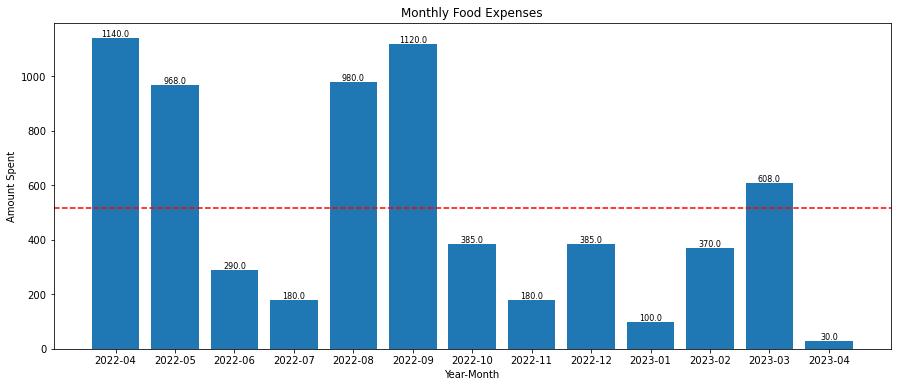

In [68]:
# Geting  the sum of expenses for each month
df_food_sum = df_food.groupby('Year_Month')['FoodExpense'].sum().reset_index()

# Plot the bar chart
plt.figure(figsize=(15,6))
bars = plt.bar(df_food_sum['Year_Month'], df_food_sum['FoodExpense'])

# Adding the sum of expenses on top of the bars
for i, bar in enumerate(bars):
    plt.text(x=bar.get_x() + bar.get_width() / 2, y=bar.get_height() + 5, 
             s=str(round(df_food_sum.loc[i, 'FoodExpense'], 2)), ha='center', fontsize=8)

# Adding the average line
plt.axhline(df_food_sum['FoodExpense'].mean(), color='red', linestyle='--')

# Seting the title and axis labels
plt.title('Monthly Food Expenses')
plt.xlabel('Year-Month')
plt.ylabel('Amount Spent')

plt.show()


# Monthly Gas/Fuel Expenses

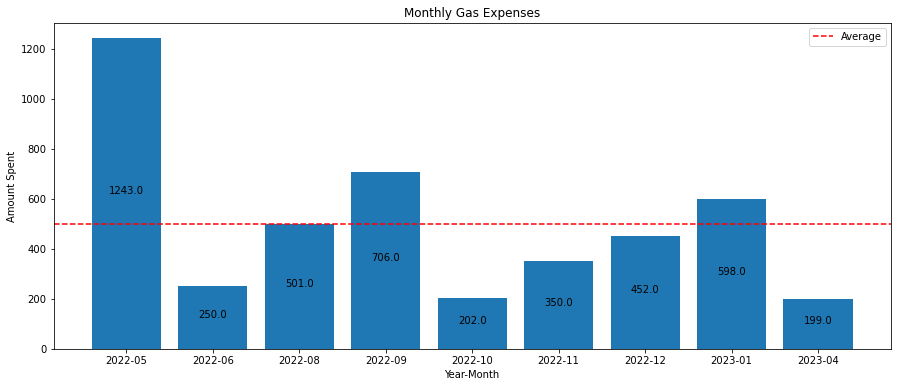

In [69]:
df_Gas = df.loc[:, ['GasExpense', 'Year_Month']]
df_Gas = df_Gas.dropna()  
df_Gas['GasExpense'] = df_Gas['GasExpense'].astype(float)

df_Gas_sum = df_Gas.groupby('Year_Month')['GasExpense'].sum().reset_index()

# calculating the average gas expense
avg_gas_expense = df_Gas_sum['GasExpense'].mean()

plt.figure(figsize=(15,6))
plt.bar(df_Gas_sum['Year_Month'], df_Gas_sum['GasExpense'])

# addding text labels for the total sum of each month
for i, v in enumerate(df_Gas_sum['GasExpense']):
    plt.text(i, v/2, str(round(v, 2)), ha='center', fontsize=10)

# adding a horizontal line for the average gas expense
plt.axhline(avg_gas_expense, color='red', linestyle='--', label='Average')

plt.title('Monthly Gas Expenses')
plt.xlabel('Year-Month')
plt.ylabel('Amount Spent')
plt.legend()
plt.show()


# Monthly Salon Expenses

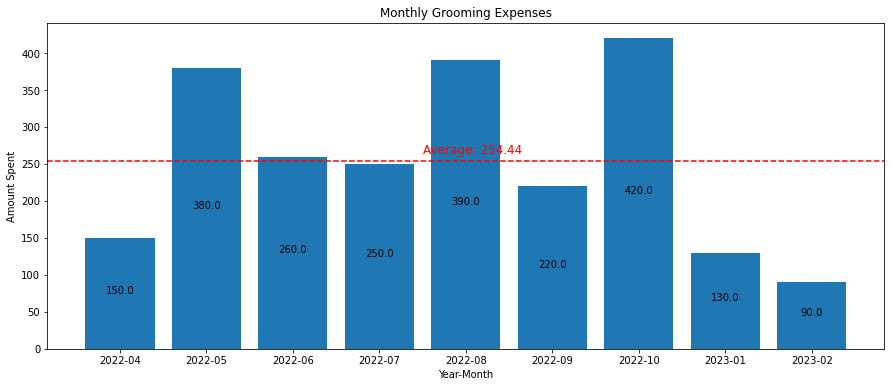

In [70]:
df_Hair = df.loc[:, ['GroomExpense', 'Year_Month']]
df_Hair = df_Hair.dropna()  
df_Hair['GroomExpense'] = df_Hair['GroomExpense'].astype(float)

df_Hair_sum = df_Hair.groupby('Year_Month')['GroomExpense'].sum().reset_index()

plt.figure(figsize=(15,6))
plt.bar(df_Hair_sum['Year_Month'], df_Hair_sum['GroomExpense'])

# add text labels for the total sum of each month
for i, v in enumerate(df_Hair_sum['GroomExpense']):
    plt.text(i, v/2, str(round(v, 2)), ha='center', fontsize=10)

# add average line
avg = df_Hair_sum['GroomExpense'].mean()
plt.axhline(avg, color='red', linestyle='--')
plt.text(len(df_Hair_sum)/2-1, avg+10, f'Average: {round(avg, 2)}', color='red', fontsize=12)

plt.title('Monthly Grooming Expenses')
plt.xlabel('Year-Month')
plt.ylabel('Amount Spent')
plt.show()


# Monthly Stationary Expenses

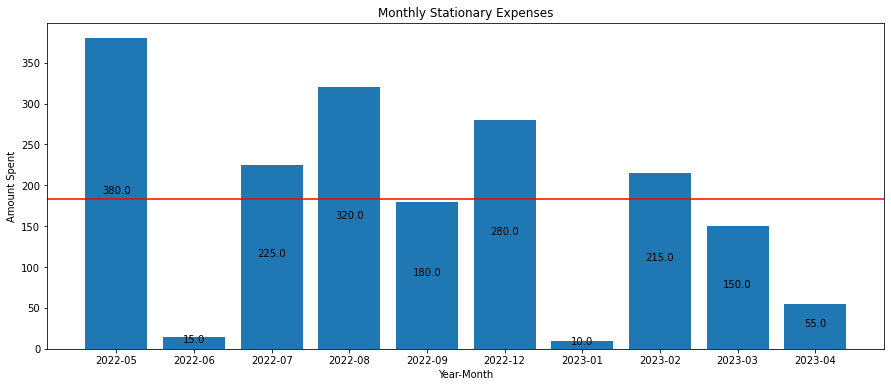

In [71]:
df_stationary = df.loc[:, ['Stat_expense', 'Year_Month']]
df_stationary = df_stationary.dropna()
df_stationary['Stat_expense'] = df_stationary['Stat_expense'].astype(float)

# grouping the DataFrame by 'Year_Month' and take the sum of 'Stat_expense' for each group
df_stationary_sum = df_stationary.groupby('Year_Month')['Stat_expense'].sum().reset_index()

# calculating the average expense for stationary items
avg_stationary_expense = df_stationary_sum['Stat_expense'].mean()

plt.figure(figsize=(15,6))
plt.bar(df_stationary_sum['Year_Month'], df_stationary_sum['Stat_expense'])

# adding a horizontal line for the average expense
plt.axhline(y=avg_stationary_expense, color='r', linestyle='-')

# adding text labels for the total sum of each month
for i, v in enumerate(df_stationary_sum['Stat_expense']):
    plt.text(i, v/2, str(round(v, 2)), ha='center', fontsize=10)

plt.title('Monthly Stationary Expenses')
plt.xlabel('Year-Month')
plt.ylabel('Amount Spent')
plt.show()


 # Monthly Bills Expenses

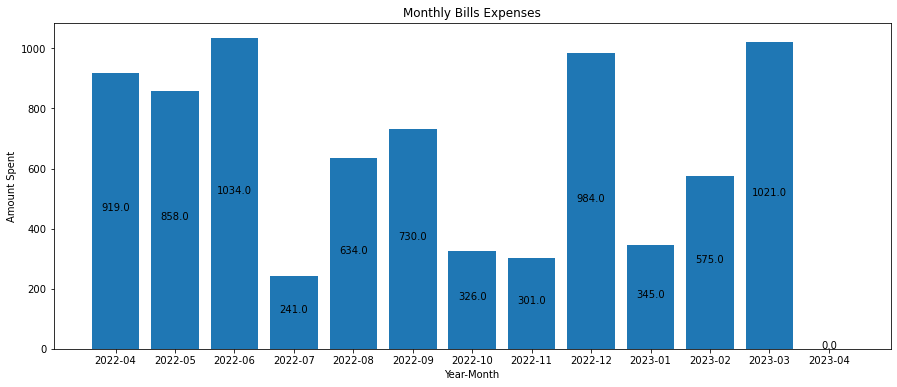

In [72]:
df_Bills = df.loc[:, ['Bills_expense', 'Year_Month']]
df_Bills.dropna()
df_Bills['Bills_expense'] = df_Bills['Bills_expense'].astype(float)

# group the DataFrame by 'Year_Month' and take the sum of 'Bills_expense' for each group
df_Bills_sum = df_Bills.groupby('Year_Month')['Bills_expense'].sum().reset_index()

plt.figure(figsize=(15,6))
plt.bar(df_Bills_sum['Year_Month'], df_Bills_sum['Bills_expense'])

# add text labels for the total sum of each month
for i, v in enumerate(df_Bills_sum['Bills_expense']):
    plt.text(i, v/2, str(round(v, 2)), ha='center', fontsize=10)

plt.title('Monthly Bills Expenses')
plt.xlabel('Year-Month')
plt.ylabel('Amount Spent')
plt.show()


### This is the completion of this project

# Author
#### Rajesh Singh



<h5>
|  Date (YYYY-MM-DD) |
    
 
    
| 2023-04-06  |
</h5>